<a href="https://colab.research.google.com/github/yoosohee/2024-1-my-BDA/blob/main/inclass/06w_0408_A_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1


In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.0 MB/s eta 0:00:00


In [7]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

In [5]:
pd.set_option('display.precision', 2)

In [6]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.48 MiB/s, done.


# 07 데이터 정제  - 빠진 데이터, 이상한 데이터 제거하기

### 결측치 찾기

#### 결측치 만들기

In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [9]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

#### 결측치 확인하기 pd.isna()

In [15]:
pd.isna(df)  # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [14]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [16]:
pd.isna(df).sum()  # 결측치 빈도 확인

sex      1
score    1
dtype: int64

In [19]:
df.isna().sum(axis=1)

0    0
1    0
2    1
3    0
4    1
dtype: int64

In [18]:
pd.Series([True, False, True]).sum()

2

In [20]:
df.isna().any()

sex      True
score    True
dtype: bool

In [22]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [23]:
df.notnull().all()

sex      False
score    False
dtype: bool

In [25]:
df.notnull().all(axis=1)

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [27]:
#적어도 하나 이상 NaN인 행을 추출, 시험 예상
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [29]:
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#### any는 하나라도 true =true, all은 전부 다 true=true

# 결측값 실사화

#### 패키지 missingno

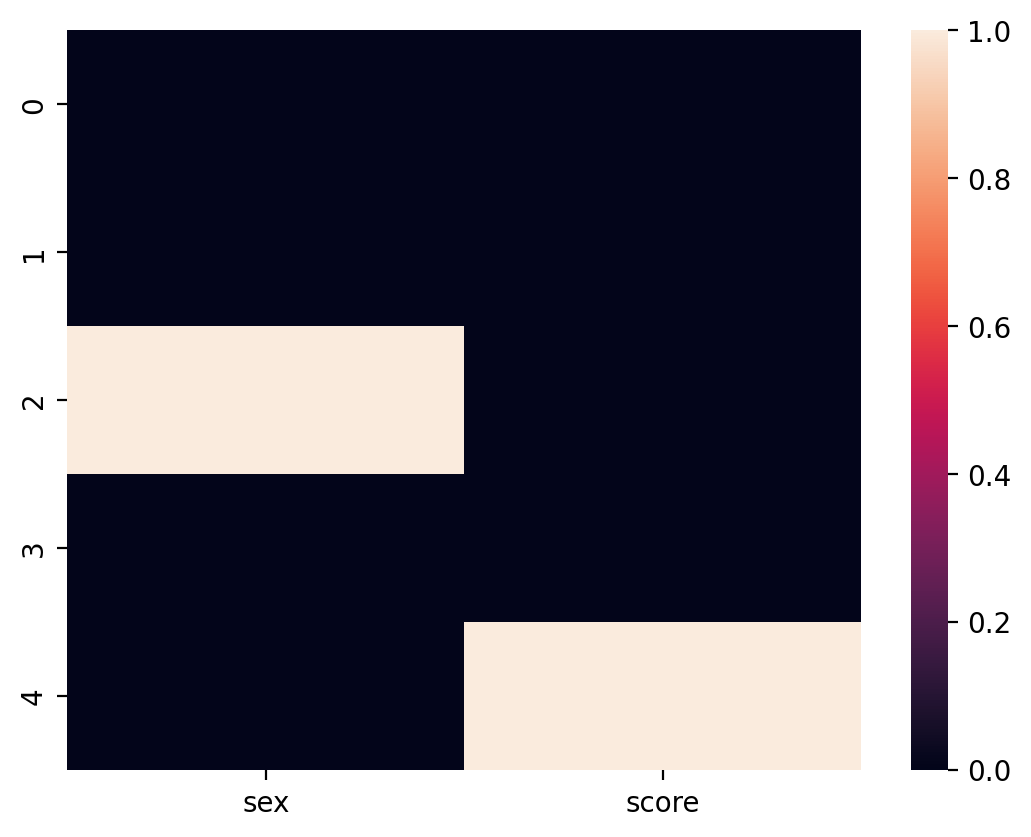

In [30]:
import seaborn as sns
sns.heatmap(df.isnull());

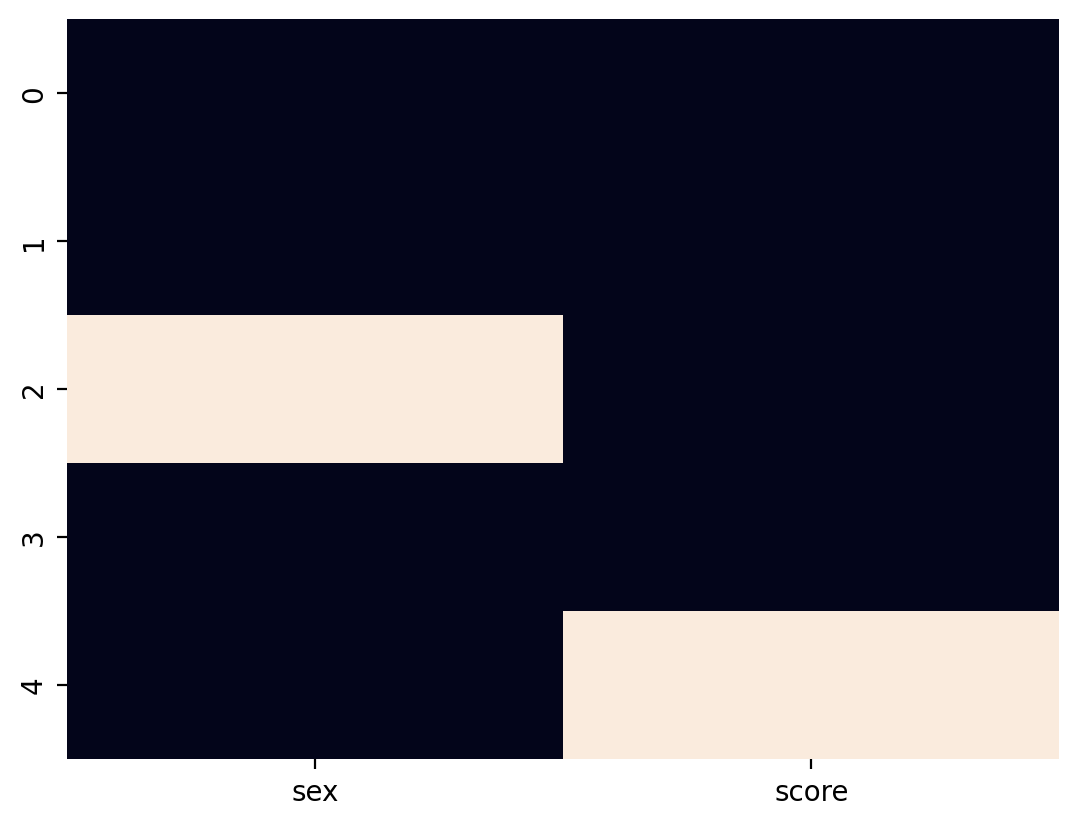

In [32]:
sns.heatmap(df.isnull(), cbar=False);

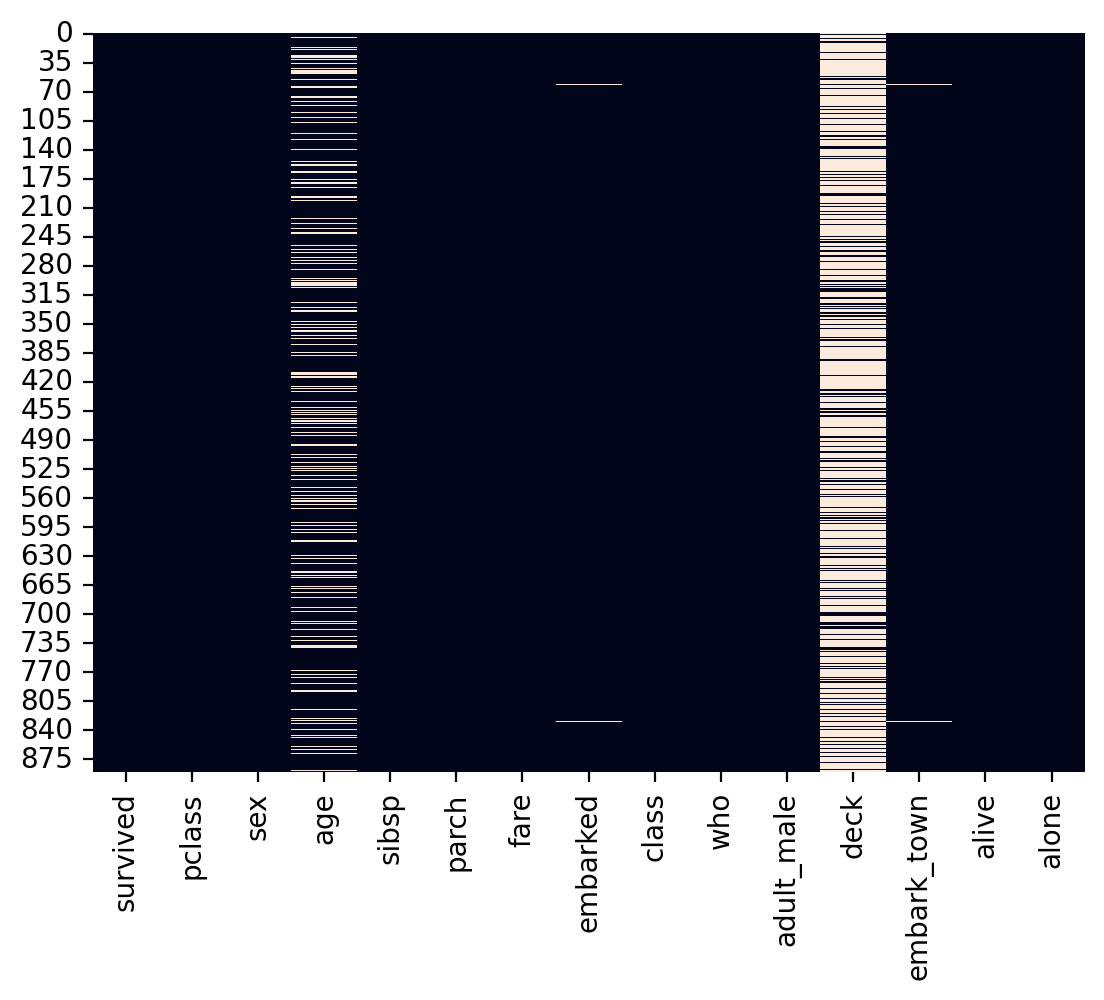

In [34]:
tdf=sns.load_dataset('titanic')
sns.heatmap(tdf.isnull(), cbar=False);

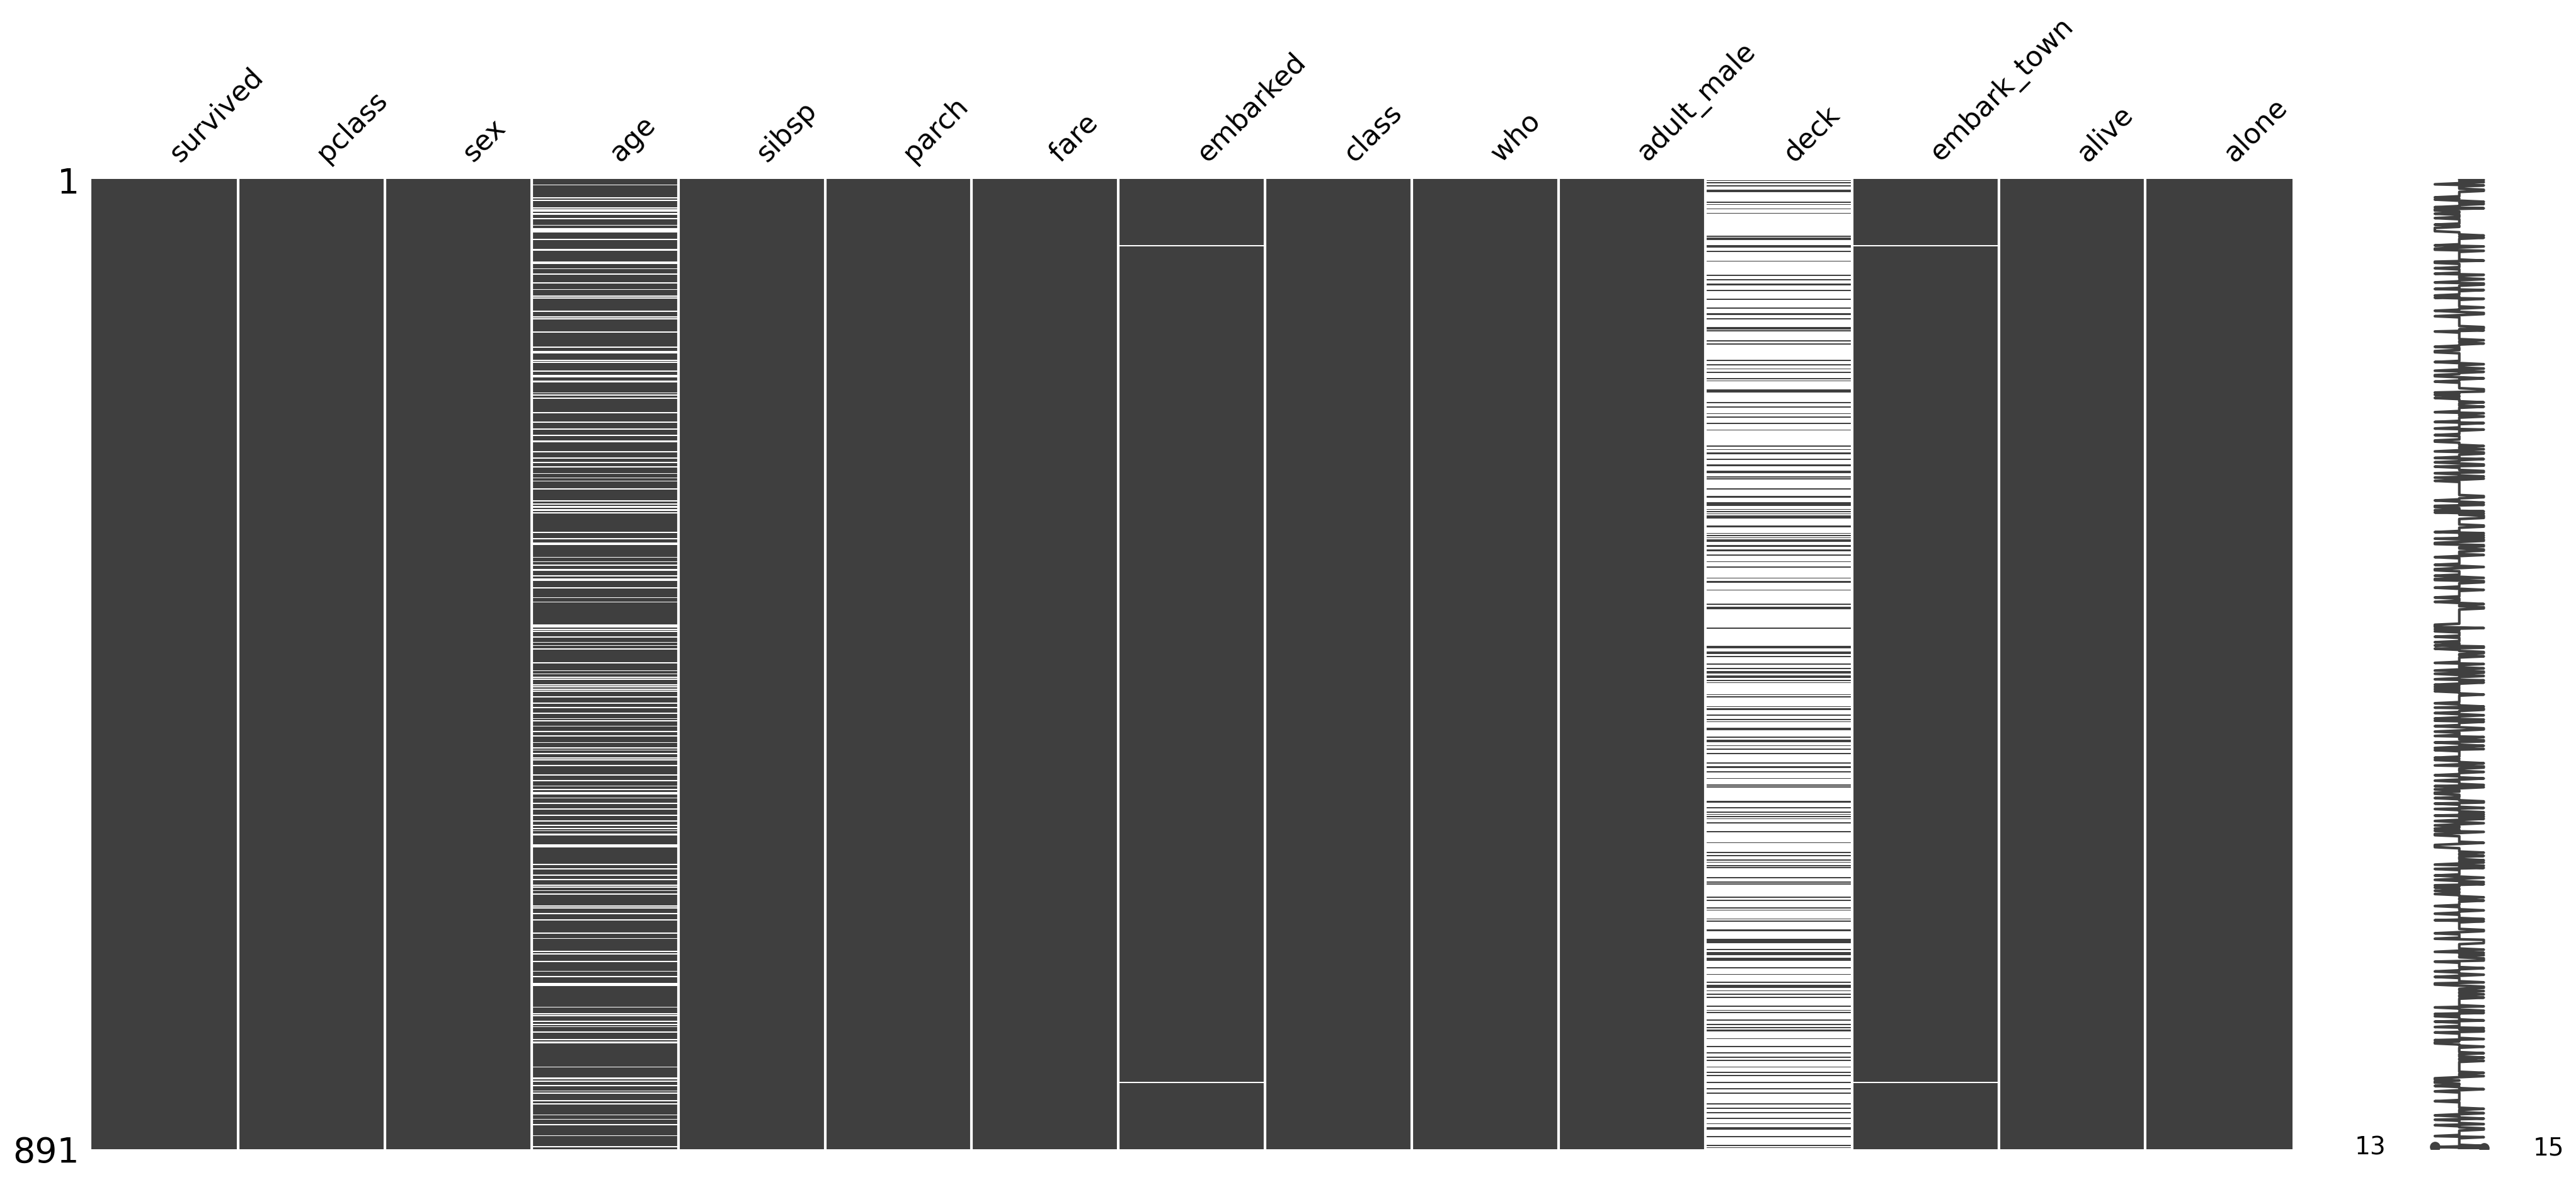

In [35]:
import missingno as msno
msno.matrix(tdf);

### 결측치 제거하기

In [36]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [37]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


* subset: 열 레이블 또는 레이블 시퀀스(선택 사항)
* 예를 들어 행을 드롭하는 경우, 다른 축인 열을 지정하면 그열에 null이 있는 행 제거

In [38]:
#열 score에 NaN이 제거
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [40]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [41]:
df.dropna(axis=1)

""
0
1
2
3
4


In [42]:
# 행 2에 NaN이 있으면 열을 제거
df.dropna(subset=[4], axis=1)

,sex
0,M
1,F
2,NaN
3,M
4,F


In [43]:
df.dropna(subset=[2,4], axis=1)

""
0
1
2
3
4


------------------------------------------------------------------------
#### (알아 두면 좋아요) 결측치 제거하지 않고 분석하기

In [44]:
df['score'].mean()

4.0

In [45]:
df['score'].sum()

16.0

In [46]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [51]:
df = pd.DataFrame(dict(age=[5, 6, np.nan],
                       born=[pd.NaT, pd.Timestamp('1939-05-27'),
                             pd.Timestamp('1940-04-25')],
                       name=['Alfred', 'Batman', ''],
                       toy=[None, 'Batmobile', 'Joker']))
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [54]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.nan],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [55]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [56]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [57]:
df.dropna(axis='columns')

""
0
1
2
3


In [60]:
df.dropna(axis=1) #axis='columns'

""
0
1
2
3


In [61]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [59]:
df.dropna(how='all') # 모든 값이 na인 경우, 행 제거

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


------------------------------------------------------------------------
### 결측치 대체하기
#### 평균값으로 결측치 대체하기

In [62]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [63]:
exam.loc[[2,7,14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [64]:
exam.loc[[2,7,14], 'math']

2    NaN
7    NaN
14   NaN
Name: math, dtype: float64

In [65]:
exam.math.mean()

55.23529411764706

In [66]:
exam['math'] = exam['math'].fillna(100)  # math가 NaN이면 100으로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


#### 07-2 이상값 정제하기

In [67]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [68]:
df['sex'].value_counts(sort = False).sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [69]:
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [70]:
df['score'].value_counts(sort = False).sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [71]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [72]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [73]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [74]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [75]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [76]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [77]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


------------------------------------------------------------------------
### 이상치 제거하기 - 극단적인 값

In [79]:
import pandas as pd
mpg=pd.read_csv('data/mpg.csv')

In [81]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
109,hyundai,sonata,2.4,1999,4,manual(m5),f,18,27,r,midsize
166,subaru,impreza awd,2.2,1999,4,manual(m5),4,19,26,r,subcompact
85,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup


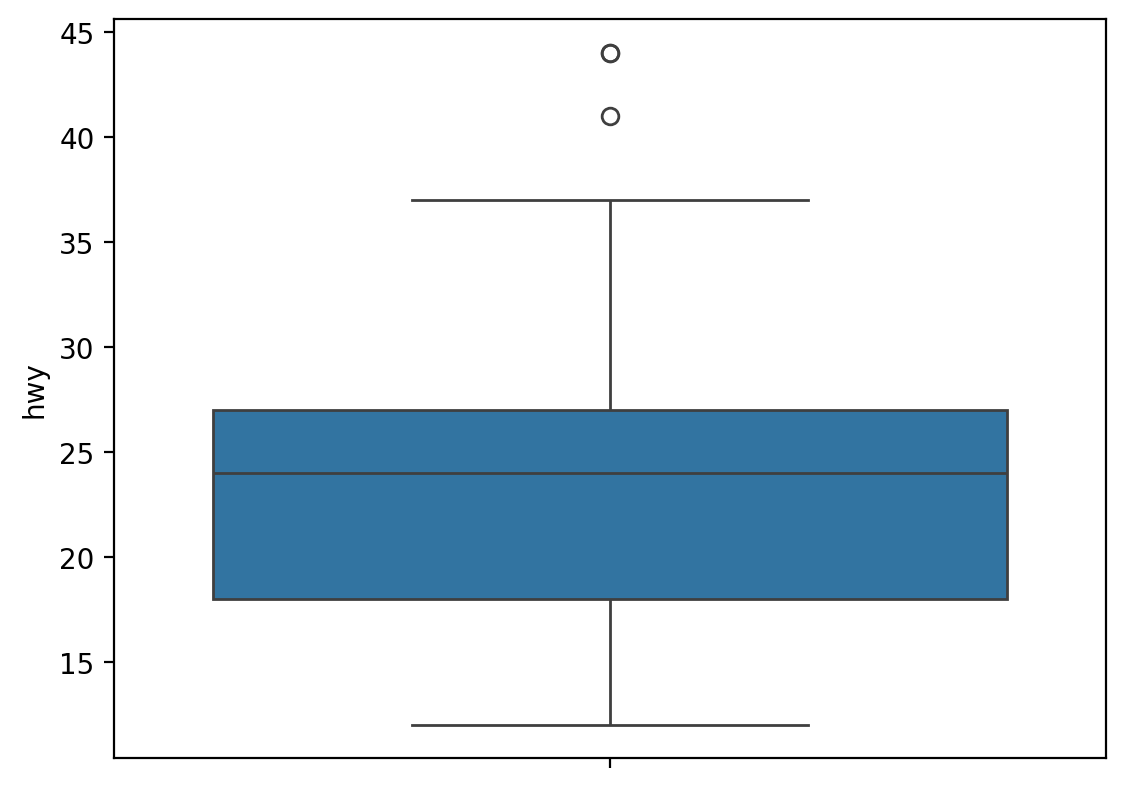

In [82]:
import seaborn as sns
sns.boxplot(mpg, y = 'hwy');

In [88]:
s1=pd.Series([1,2,3,4,5])

In [89]:
s1.quantile(.50)

3.0

In [90]:
s1.quantile([.25, .50, .75])

0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64

In [91]:
s2.pd.Series([1,2,3,4,5])

NameError: name 's2' is not defined

In [92]:
s2.quantile(.50)

NameError: name 's2' is not defined

In [94]:
s2.quantile([.25, .50, .75])

NameError: name 's2' is not defined

In [93]:
pct25=mpg['hwy'].quantile(.25)
pct25

18.0

In [95]:
pct75+1.5*iqr #상한

NameError: name 'pct75' is not defined

In [96]:
mpg['hwy'].describe()['25%']

18.0

In [98]:
dmpg=mpg.dropna(subset=['hwy'])
len(dmpg)

234

In [99]:
dmpg.dropna(subset=['hwy'].groupby('drv')).agg(mean_hwy=('hwy', 'mean'))

AttributeError: 'list' object has no attribute 'groupby'

In [100]:
dmpg.groupby('drv').agg(mean_hwy=('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [101]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

## 정리하기


In [78]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

NameError: name 'mpg' is not defined